#Se realizara el reto planteado



In [609]:
#Importamos las librerías
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [610]:
labels_df = pd.read_excel('/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/Etiquetas.xlsx', header = None) # Es el archivo de excel

In [611]:
#visualizamos el archivo
labels_df.head()

,0,1
0,20240920_095109,orquidea
1,20240920_095152,orquidea
2,20240920_095224,flor
3,20240920_095235,flor
4,20240920_095258,flor


In [612]:
#Separamos los nombres de archivos de las etiquetas
filenames = labels_df.iloc[:,0].values #Nombres
labels = labels_df.iloc[:,1].values #Etiquetas

In [613]:
from sklearn.preprocessing import LabelEncoder

In [614]:
#Codificamos las etiquetas
#Instanciamos el codificador
label_encoder = LabelEncoder()
#Aplicamos la doficiación en las etiquetas
labels = label_encoder.fit_transform(labels)

In [615]:
#Aplicamos el one_hot encoding para tener las salidas requeridas por el softmaz
labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=2)

In [616]:
#Ajustamos la resolución de las imágenes para homogenizar y abajar la carga computacional del procesamiento
#Definimos el tamaño
img_size = (62,62)

In [617]:
#Definimos una función de carga y procesamiento de las imágenes

def load_and_preprocess_image(filename, img_size):
  #Abrimos y cargamos cada imagen en la variable img
    img = Image.open(filename)
    #cambiamos el tamaño de la imagen
    img = img.resize(img_size)
    #Ponemos los valores de intensidad entre 0 y 1
    img = np.array(img).astype('float32') / 255
    if img.shape[-1] == 6: #Comprobamos si existe canal alfa
      img = img[...,:4]
    return img # The return is outside the if block

In [618]:
#cargamos las imágenes desde nuestro sistema de archivos

#agregamos la extensión a cada nombre de la imagen
filenames_with_extension = [fname + ".jpg" for fname in filenames]
#difinimos el directorio con las imágenes
image_dir = '/content/drive/MyDrive/Aprendizaje Supervisado/Bases de Datos/fotos_flores'
#cargamos las imágenes
images = np.array([load_and_preprocess_image(os.path.join(image_dir,
                                                          fname),img_size) for fname in filenames_with_extension])


In [619]:
images.shape

(287, 62, 62, 3)

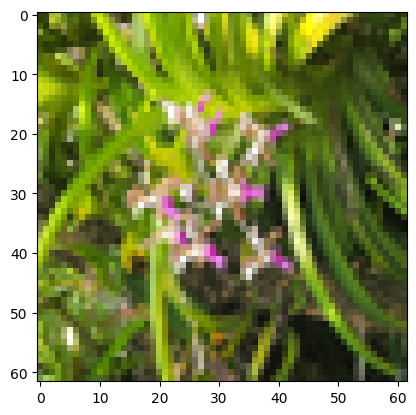

In [620]:
#si queremos las imágenes del conjunto de datos (no las matrices numéricas)
import matplotlib.pyplot as plt
plt.imshow(images[10,:,:,:]);

In [621]:
#Dividimos nuestro conjunto de imágnes en train y test

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

In [622]:
#Aplanamos las imágenes
train_images = train_images.reshape((train_images.shape[0], img_size[0] * img_size[1] * 3))
test_images = test_images.reshape((test_images.shape[0], img_size[0] * img_size[1] * 3))

In [623]:
train_images.shape

(229, 11532)

In [624]:
from threading import active_count
#Construimos el modelo de red neuronal
#Definimos que el modelo será secuencial (una capa después de la otra)
model = models.Sequential()
#Agregamos las capas de la red
model.add(layers.Dense(62, activation= 'relu', input_shape = (img_size[0]*img_size[1]*3,)))#Entrada
model.add(layers.Dense(2, activation = 'softmax')) #Salida

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [625]:
#Compilamos el modelo
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [626]:
#Entrenamos el modelo
history = model.fit(train_images, train_labels,
                    epochs = 20,
                    validation_data = (test_images, test_labels))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5373 - loss: 0.8287 - val_accuracy: 0.5862 - val_loss: 0.6674
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5824 - loss: 0.6825 - val_accuracy: 0.4828 - val_loss: 0.6958
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5697 - loss: 0.6669 - val_accuracy: 0.4655 - val_loss: 0.6952
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5329 - loss: 0.6633 - val_accuracy: 0.5690 - val_loss: 0.6849
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6588 - loss: 0.6520 - val_accuracy: 0.6207 - val_loss: 0.6372
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5641 - loss: 0.6441 - val_accuracy: 0.4483 - val_loss: 0.7103
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6513 - loss: 0.6235 - val_accuracy: 0.6034 - val_loss: 0.6295
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7220 - loss: 0.6168 - val_accuracy: 0.5862 - val_loss: 0.6540


In [627]:
#Evaluamos el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7087 - loss: 0.6355 
Test accuracy: 0.6724137663841248
